In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [7]:
train_dataset = h5py.File('datasets/train.h5', "r")
X_train_raw = np.array(train_dataset["train_set_x"][:])
y_train_raw = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('datasets/test.h5', "r")
X_test_raw = np.array(test_dataset["test_set_x"][:])
y_test_raw = np.array(test_dataset["test_set_y"][:])

In [9]:
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1).T / 255
X_test = X_test_raw.reshape(X_test_raw.shape[0], -1).T / 255

y_train = y_train_raw.reshape((1, y_train_raw.shape[0]))
y_test = y_test_raw.reshape((1, y_test_raw.shape[0]))

In [20]:
class LinearRegressor():
    def __init__(self, learning_rate=0.5, num_iterations=2000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def initialize(self, dim):
        self.w = np.zeros((dim, 1))
        self.b = 0
        
    def propagate(self, X, Y):
        m = X.shape[1]
    
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)

        cost = -1 / m * np.sum((Y * np.log(A) + (1 - Y) * np.log(1 - A)))
    
        self.dw = 1 / m * np.dot(X, (A -  Y).T)
        self.db = 1 / m * np.sum(A - Y)

        cost = np.squeeze(cost)
        return cost
            
    def optimize(self, X, y):
        costs = []
    
        for i in range(self.num_iterations):
                
            cost = self.propagate(X, y)
        
            self.w = self.w - self.learning_rate * self.dw
            self.b = self.b - self.learning_rate * self.db
        
            if i % 100 == 0:
                costs.append(cost)
            
        return costs
        
    def sigmoid(self, z):
        return 1 / (1  + np.exp(-z))

    def fit(self, X, y):
        self.initialize(X.shape[0])

        self.costs = self.optimize(X, y)
    
        return self

    def predict(self, X):
        m = X.shape[1]
        prediction = np.zeros((1, m))
        self.w = self.w.reshape(X.shape[0], 1)
    
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)
        
        for i in range(A.shape[1]):
            if (A[0, i] >= 0.5):
                prediction[0, i] = 1.0
    
        return prediction        

In [21]:
model = LinearRegressor(learning_rate=0.005)

model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

In [22]:
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction - y_test)) * 100))

test accuracy: 70.0 %


Text(0.5, 1.0, 'Learning rate 0.005')

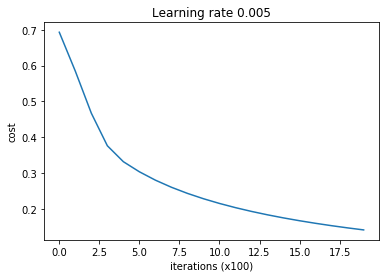

In [23]:
plt.plot(model.costs)
plt.ylabel('cost')
plt.xlabel('iterations (x100)')
plt.title('Learning rate ' + str(model.learning_rate))